# Implementing VGG on CIFAR-10 with TensorFlow

In this notebook, the VGG architecture is implemented using TensorFlow on the CIFAR-10 dataset for image classification. VGG is a popular deep learning model known for its simplicity and effectiveness in various computer vision tasks.


## Loading Necessary Libraries

In [143]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


## Dataset

The CIFAR-10 dataset is loaded, encompassing a collection of 60,000 32x32 color images divided into 10 distinct classes. To ensure consistency and facilitate model training, the pixel values are normalized to fall within the range [0, 1]. 


In [127]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [128]:
print("Shape of the training image dataset:", train_images.shape)
print("Shape of the test image dataset:", test_images.shape)

Shape of the training image dataset: (50000, 32, 32, 3)
Shape of the test image dataset: (10000, 32, 32, 3)


## CIFAR-10 Dataset Visualization

In this section, a sample of images from the CIFAR-10 dataset is visualized to gain a better understanding of the dataset's content. The CIFAR-10 dataset comprises 60,000 32x32 color images distributed across 10 different classes, with each class representing a distinct object or animal category.

The `matplotlib` library is utilized to display a 5x5 grid of images, with each image being labeled with its corresponding class name.

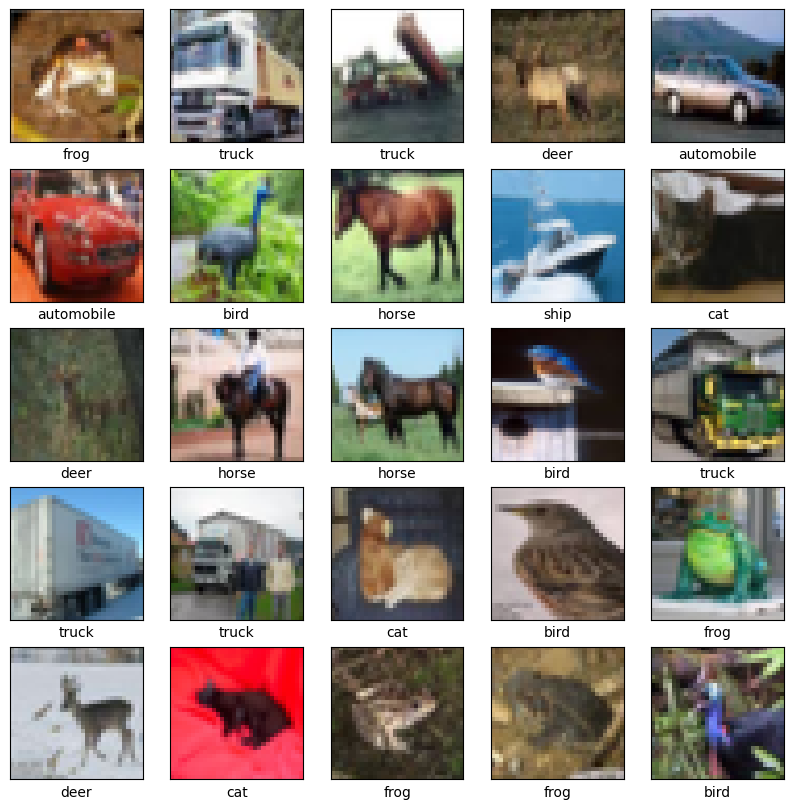

In [129]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## VGG-like Convolutional Neural Network

This code defines a VGG-like CNN using `Keras Sequential API` for image classification. The architecture comprises:

- **Convolutional Blocks:** Four blocks with Conv2D layers, ReLU activation, BatchNormalization, and MaxPooling2D.
  
- **Fully Connected Layers:** Two Dense layers with ReLU, BatchNormalization, and Dropout (0.5).

- **Output Layer:** Dense layer with softmax for 10-class classification.

The filter sizes and input shape have been modified to accomodate the CIFAR-10 dataset


In [130]:
model = Sequential()

# 1st Conv Block
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

# 2nd Conv Block
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

# 3rd Conv Block
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

# 4th Conv Block (Optional, can be removed for CIFAR-10 due to image size)
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))  
# Model Summary
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_73 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_28 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_74 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_75 (Conv2D)          (None, 16, 16, 64)       

In [131]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_73 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_28 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_74 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_75 (Conv2D)          (None, 16, 16, 64)       

In [132]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Neural Network Training with GPU

`batch_size` is set to 512 (training data will be divided into batches of 512 samples each) for efficiency.
`epochs=20` training will run for 20 epochs (reduced for speed)


This code run in 1.1 minutes.

In [133]:
batch_size = 512
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    history = model.fit(train_images, 
                        train_labels, 
                        batch_size=batch_size, 
                        epochs=20, 
                        validation_data=(test_images, test_labels), 
                        verbose=1)

Epoch 1/20
98/98 [==============================] - 4s 39ms/step - loss: 1.9727 - accuracy: 0.3685 - val_loss: 3.7885 - val_accuracy: 0.1000
Epoch 2/20
98/98 [==============================] - 4s 37ms/step - loss: 1.2789 - accuracy: 0.5491 - val_loss: 5.5599 - val_accuracy: 0.1000
Epoch 3/20
98/98 [==============================] - 4s 37ms/step - loss: 1.0091 - accuracy: 0.6457 - val_loss: 5.4200 - val_accuracy: 0.1106
Epoch 4/20
98/98 [==============================] - 4s 37ms/step - loss: 0.8109 - accuracy: 0.7168 - val_loss: 3.6566 - val_accuracy: 0.2216
Epoch 5/20
98/98 [==============================] - 4s 36ms/step - loss: 0.6628 - accuracy: 0.7699 - val_loss: 2.2780 - val_accuracy: 0.3820
Epoch 6/20
98/98 [==============================] - 4s 36ms/step - loss: 0.5481 - accuracy: 0.8111 - val_loss: 1.0381 - val_accuracy: 0.6592
Epoch 7/20
98/98 [==============================] - 4s 36ms/step - loss: 0.4514 - accuracy: 0.8456 - val_loss: 0.9555 - val_accuracy: 0.7173
Epoch 8/20
98

## Test loss and accuracy

The model had a loss of 1.26 and accuracy of 0.75, which is acceptable.

In [134]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 1.2633 - accuracy: 0.7504
Test Loss: 1.2633305788040161
Test Accuracy: 0.7504000067710876


## Visualization of loss and Accuracy

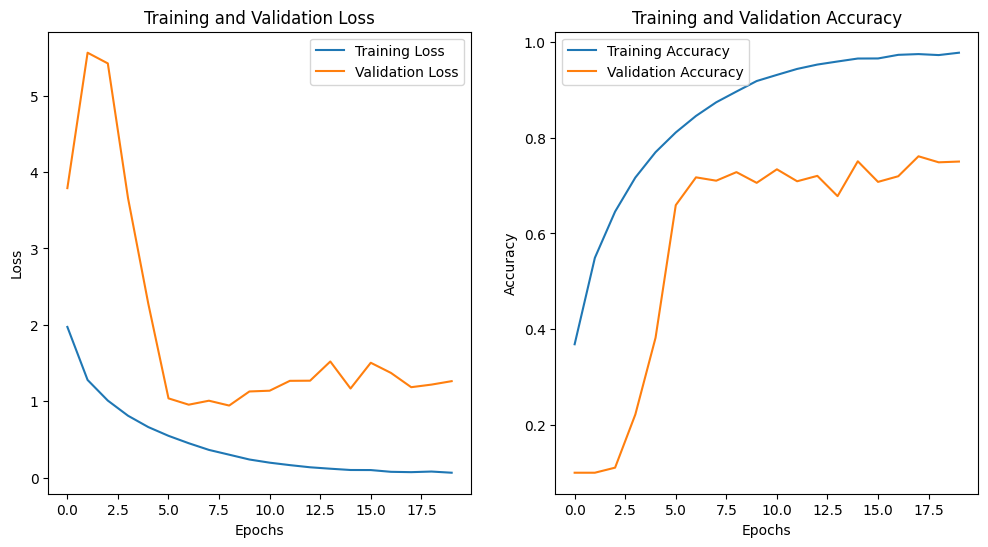

In [135]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Extracting Intermediate Layer Outputs

The architecture of the model is examined by extracting its intermediate layer outputs. This process serves as a means to inspect the shape and activations within the model at various stages.

In [136]:
intermediate_layer_model = Model(inputs=model.input, outputs=[layer.output for layer in model.layers])
intermediate_outputs = intermediate_layer_model.predict(train_images[:1])

for i, intermediate_output in enumerate(intermediate_outputs):
    print(f"Layer {i} output shape: {intermediate_output.shape}")


1/1 [==============================] - 0s 113ms/step
Layer 0 output shape: (1, 32, 32, 32)
Layer 1 output shape: (1, 32, 32, 32)
Layer 2 output shape: (1, 16, 16, 32)
Layer 3 output shape: (1, 16, 16, 32)
Layer 4 output shape: (1, 16, 16, 64)
Layer 5 output shape: (1, 16, 16, 64)
Layer 6 output shape: (1, 8, 8, 64)
Layer 7 output shape: (1, 8, 8, 64)
Layer 8 output shape: (1, 8, 8, 128)
Layer 9 output shape: (1, 8, 8, 128)
Layer 10 output shape: (1, 4, 4, 128)
Layer 11 output shape: (1, 4, 4, 128)
Layer 12 output shape: (1, 4, 4, 256)
Layer 13 output shape: (1, 4, 4, 256)
Layer 14 output shape: (1, 2, 2, 256)
Layer 15 output shape: (1, 2, 2, 256)
Layer 16 output shape: (1, 1024)
Layer 17 output shape: (1, 512)
Layer 18 output shape: (1, 512)
Layer 19 output shape: (1, 512)
Layer 20 output shape: (1, 512)
Layer 21 output shape: (1, 512)
Layer 22 output shape: (1, 512)
Layer 23 output shape: (1, 10)


## Visualization of correct and incorrect predictions

1/1 [==============================] - 0s 91ms/step


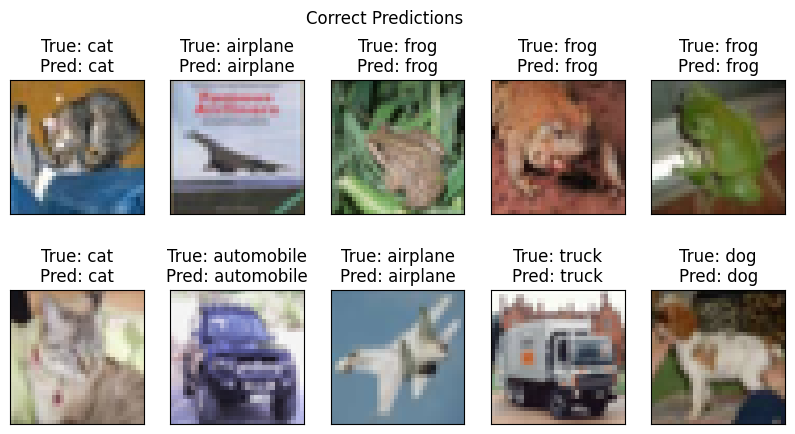

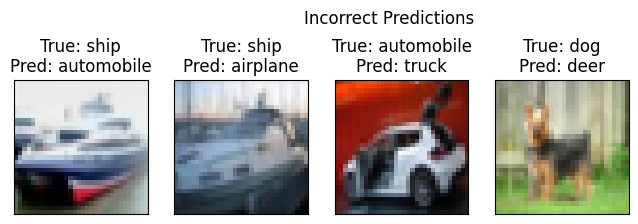

In [137]:
num_images_to_predict = 30
sample_test_images = test_images[:num_images_to_predict]
sample_test_labels = test_labels[:num_images_to_predict]

# Predictions
predicted_scores = model.predict(sample_test_images)
predicted_labels = np.argmax(predicted_scores, axis=1)

# Identifying right and wrong predictions
correct_indices = np.where(predicted_labels == sample_test_labels.flatten())[0]
incorrect_indices = np.where(predicted_labels != sample_test_labels.flatten())[0]

def plot_images(indices, title):
    plt.figure(figsize=(10, 5))
    for i, index in enumerate(indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(sample_test_images[index])
        plt.title(f"True: {class_names[sample_test_labels[index][0]]}\nPred: {class_names[predicted_labels[index]]}")
        plt.xticks([])
        plt.yticks([])
    plt.suptitle(title)
    plt.show()

plot_images(correct_indices[:min(len(correct_indices), 10)], "Correct Predictions")
plot_images(incorrect_indices[:min(len(incorrect_indices), 10)], "Incorrect Predictions")

## Confusion Matrix

313/313 [==============================] - 1s 2ms/step


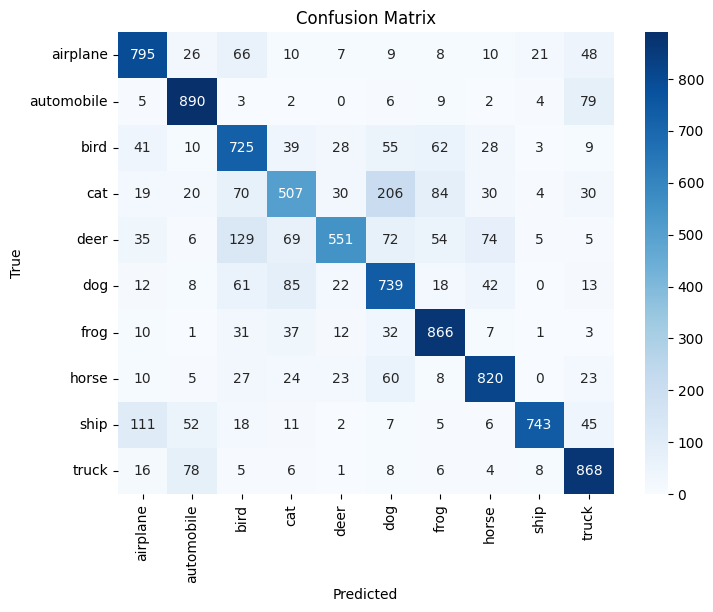

In [138]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
confusion_mtx = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [139]:
class_report = classification_report(test_labels, predicted_labels, target_names=class_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    airplane       0.75      0.80      0.77      1000
  automobile       0.81      0.89      0.85      1000
        bird       0.64      0.72      0.68      1000
         cat       0.64      0.51      0.57      1000
        deer       0.82      0.55      0.66      1000
         dog       0.62      0.74      0.67      1000
        frog       0.77      0.87      0.82      1000
       horse       0.80      0.82      0.81      1000
        ship       0.94      0.74      0.83      1000
       truck       0.77      0.87      0.82      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



**Note**: The Classification Report provides detailed metrics for evaluating the performance of a classification model. It includes precision (accuracy of positive predictions), recall (ability to identify relevant instances), F1-Score (harmonic mean of precision and recall), support (number of samples per class), and overall accuracy. For example, it highlights that the model shows higher precision in predicting `ship`and `automobile` classes, while its recall for the `deer` class is relatively lower.


## Visualizing Feature Maps

Exploring feature maps from intermediate layers of the model. 

1/1 [==============================] - 0s 13ms/step


C:\Users\Sami\AppData\Local\Temp\ipykernel_15200\1784293345.py:18: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\Sami\AppData\Local\Temp\ipykernel_15200\1784293345.py:21: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')
C:\Users\Sami\AppData\Local\Temp\ipykernel_15200\1784293345.py:18: RuntimeWarning: divide by zero encountered in divide
  x /= x.std()


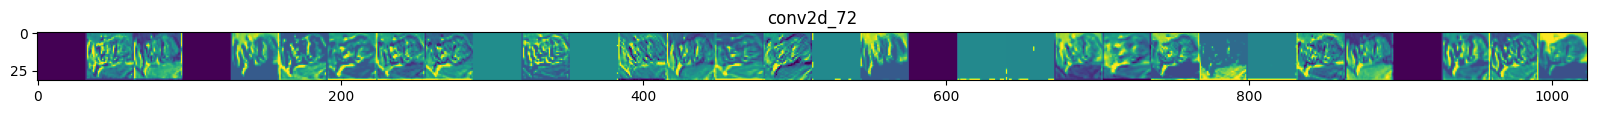

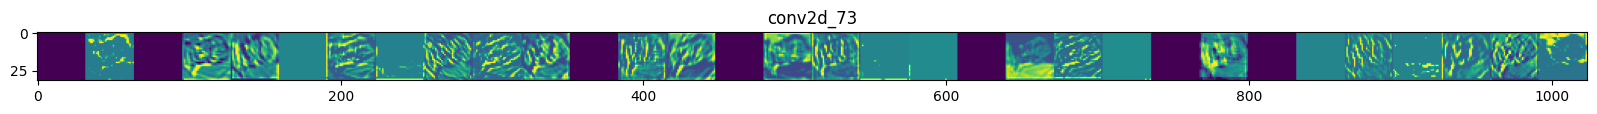

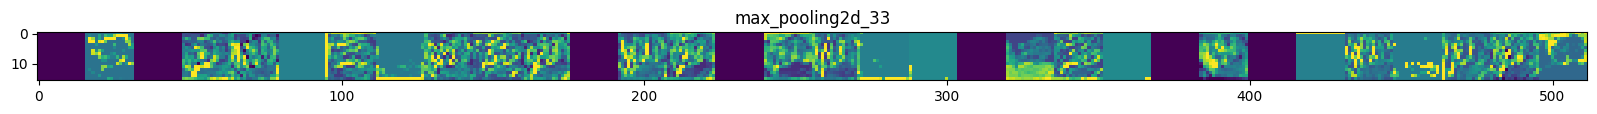

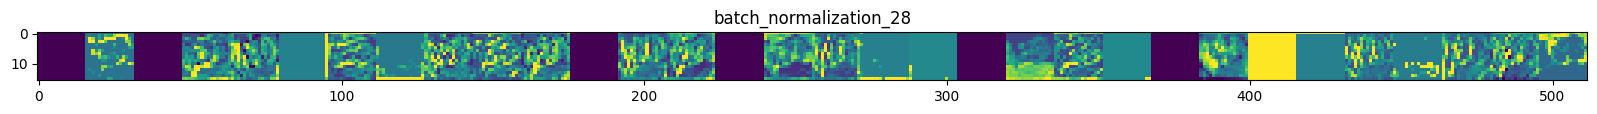

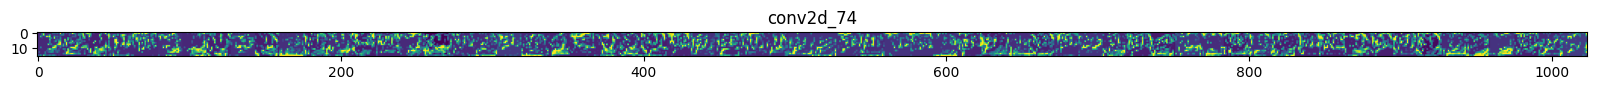

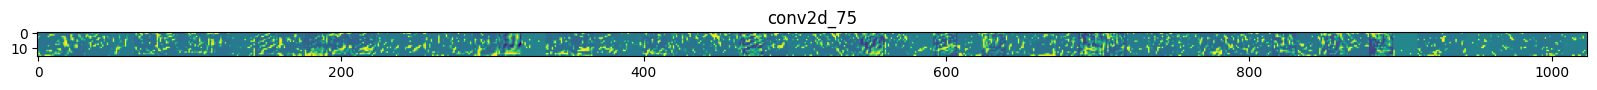

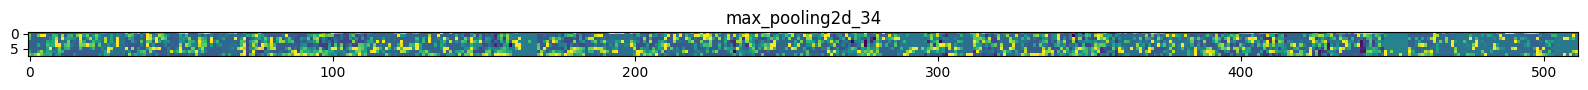

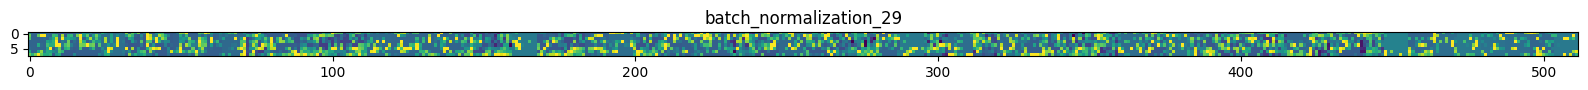

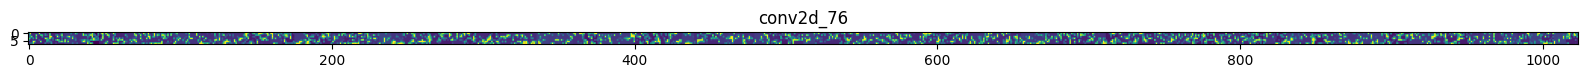

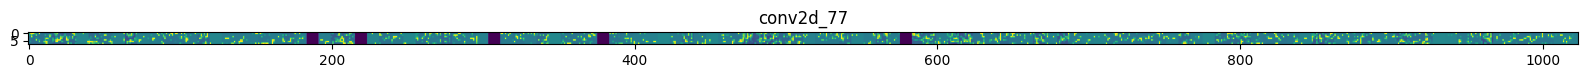

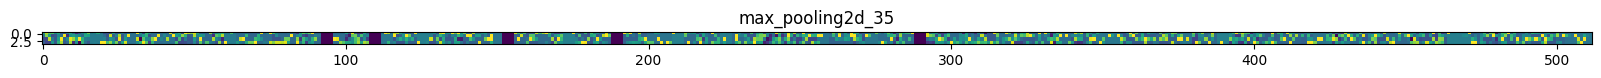

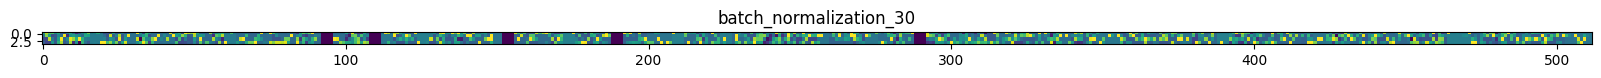

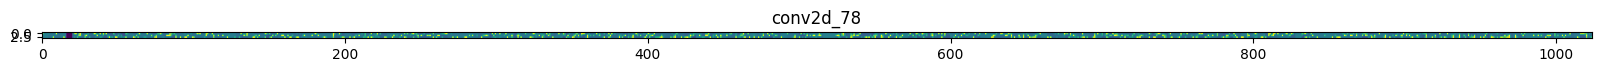

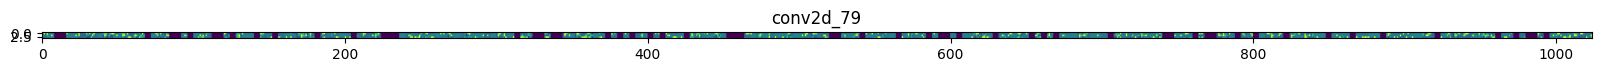

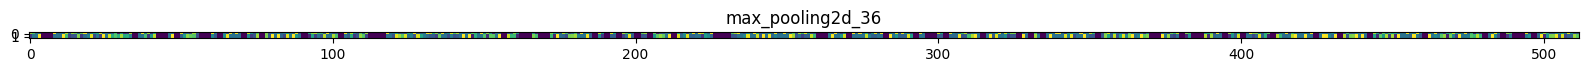

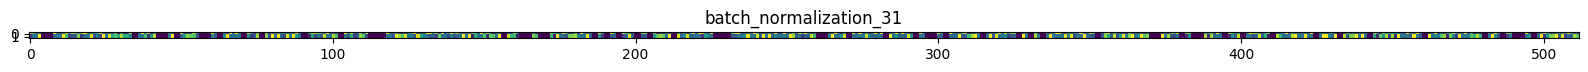

In [142]:
input_image = test_images[0:1]  # Selecting the first image
feature_maps = intermediate_layer_model.predict(input_image)
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]  
        size = feature_map.shape[1]  
        
        display_grid = np.zeros((size, size * n_features))
        
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            
            display_grid[:, i * size : (i + 1) * size] = x

        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
#next steps: using tensorboard, learning rate scheduling, hyperparameter tuning, visualizations of feature maps 